In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
data=pd.read_csv("/content/Data_Train.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.shape

(10683, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
category=['Airline','Source','Destination','Additional_Info']
category

['Airline', 'Source', 'Destination', 'Additional_Info']

In [ ]:
for i in category:
    print(i, data[i].unique())


Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [ ]:
category_cols=data.select_dtypes(include=['object']).columns
category_cols


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

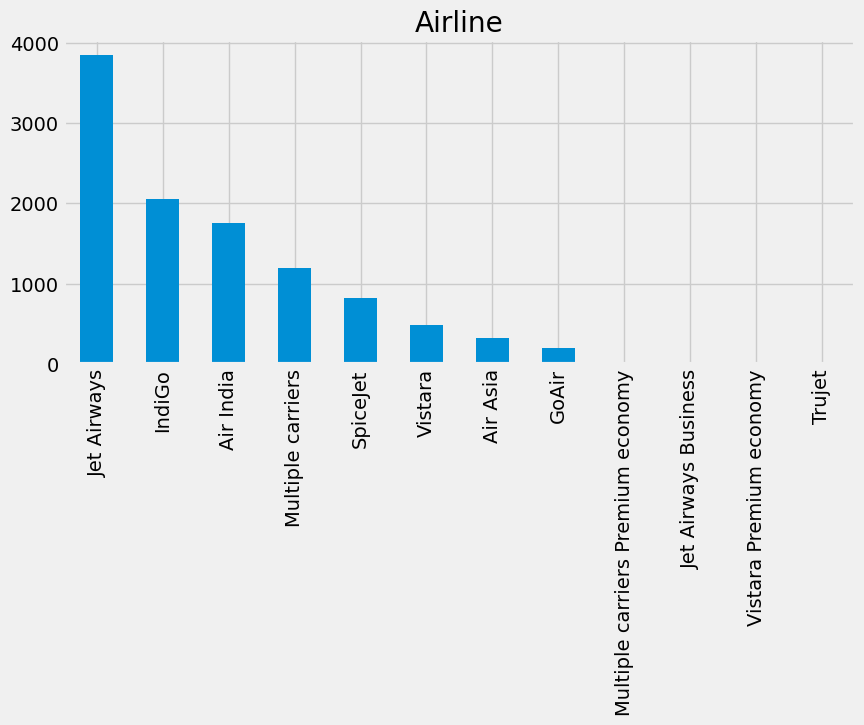

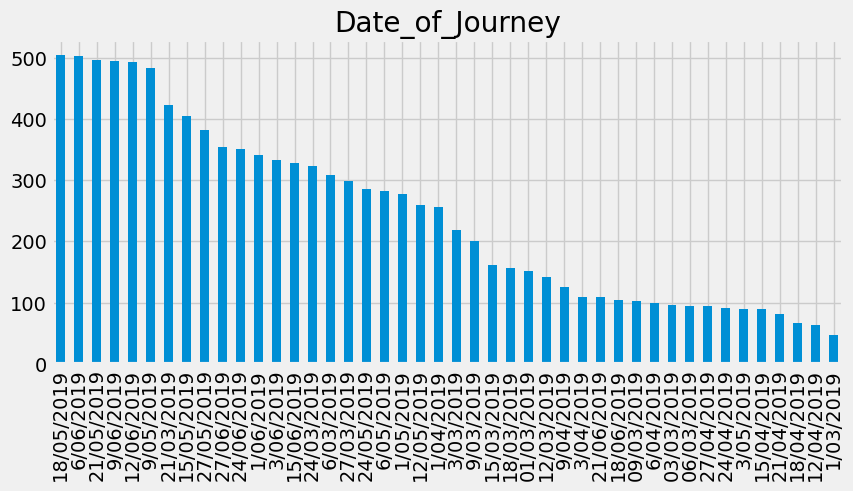

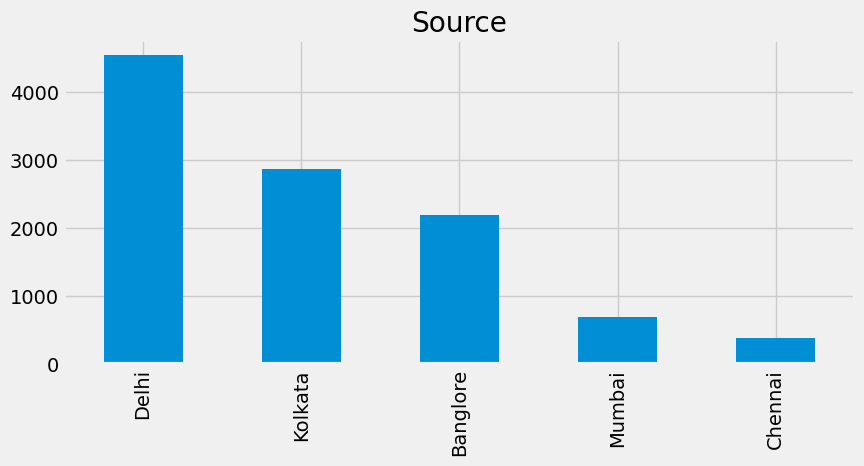

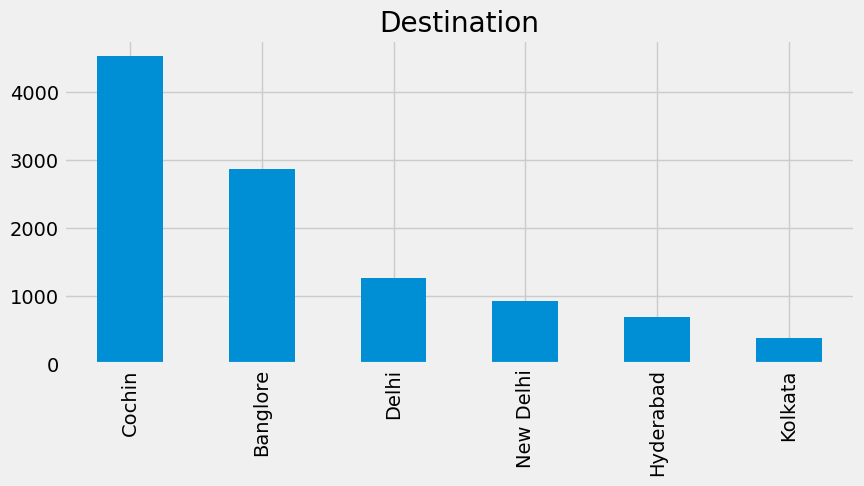

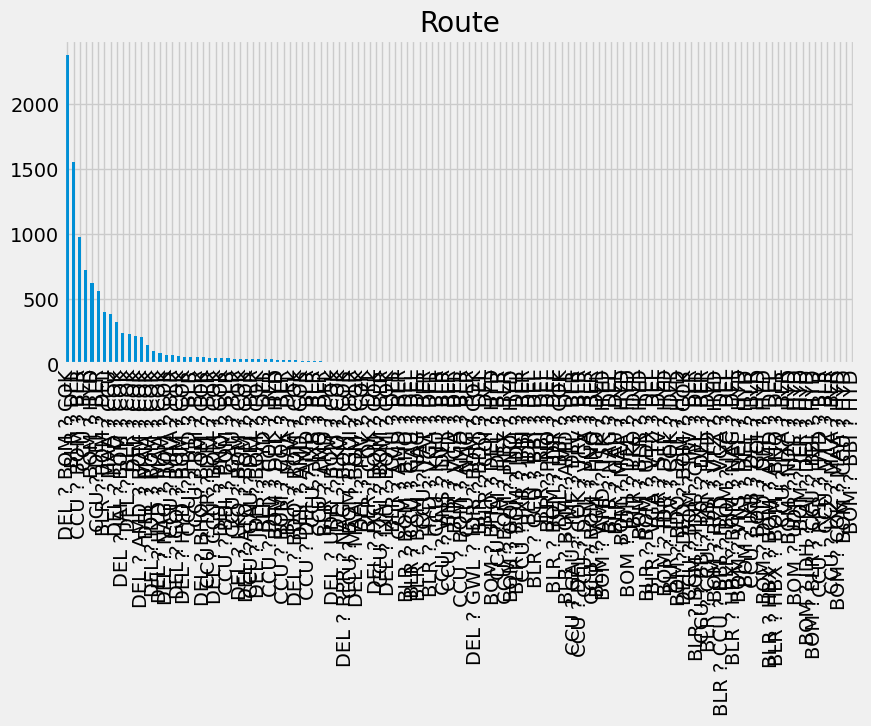

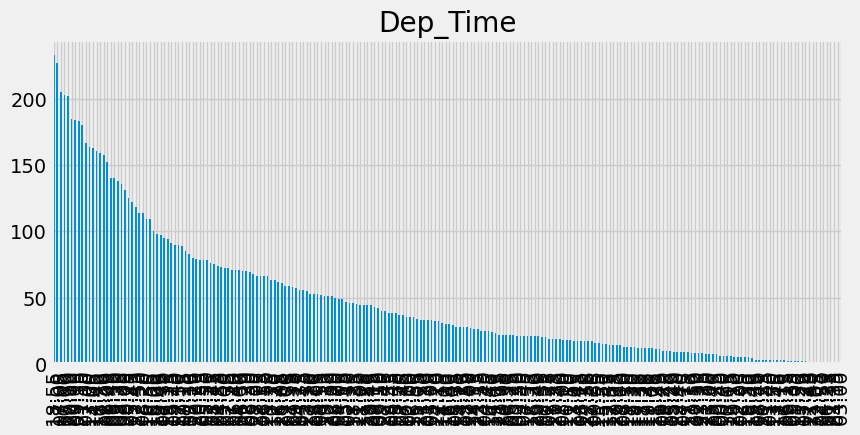

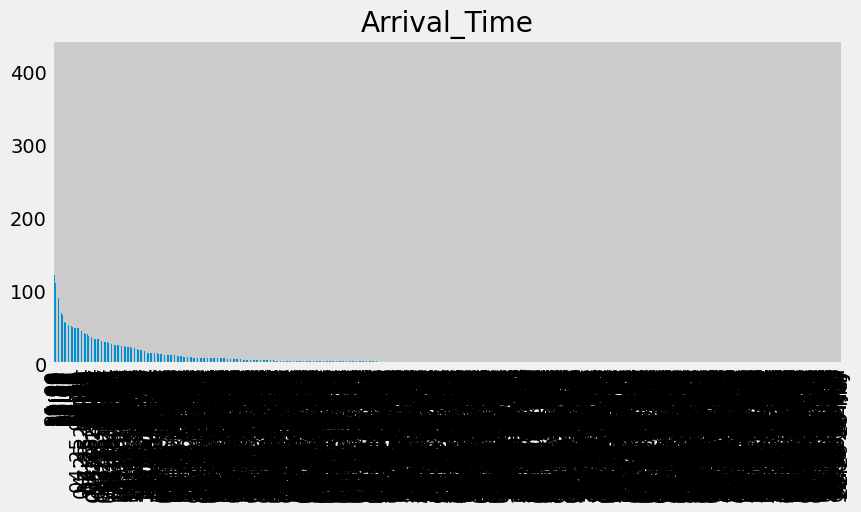

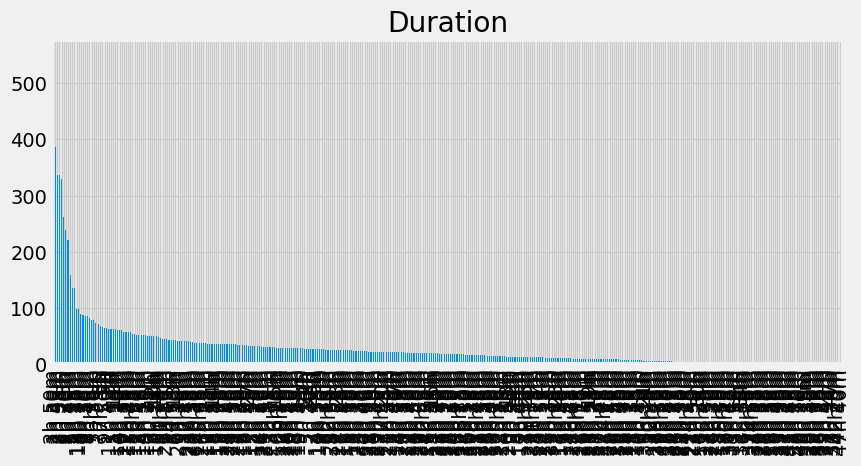

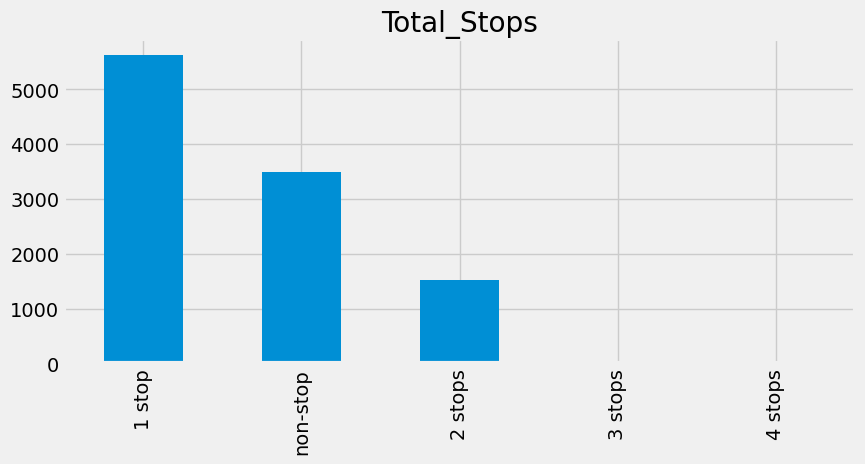

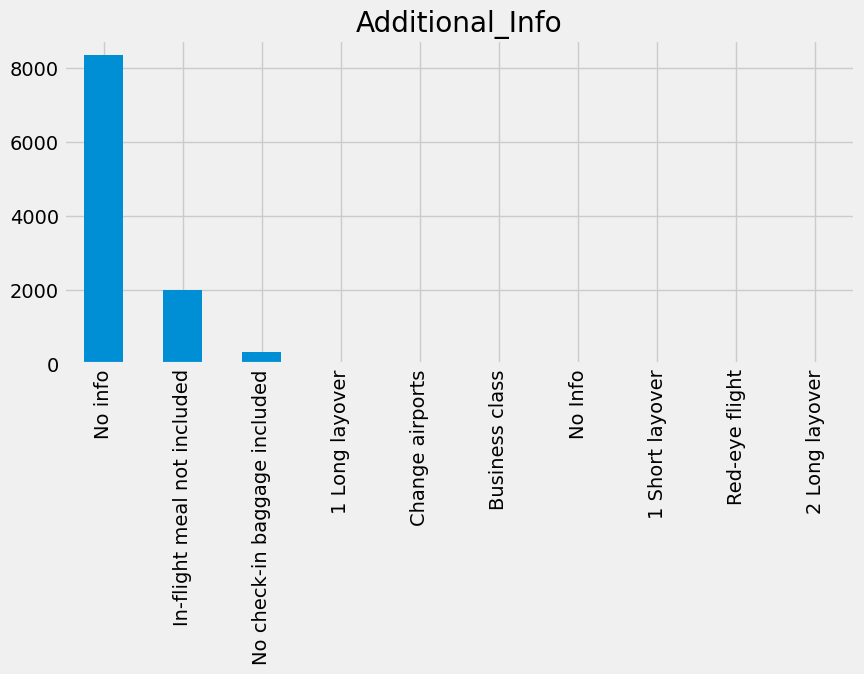

In [ ]:
for column in category_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [ ]:
data.Route=data.Route.str.split('->')
data.Route

0                    [BLR ? DEL]
1        [CCU ? IXR ? BBI ? BLR]
2        [DEL ? LKO ? BOM ? COK]
3              [CCU ? NAG ? BLR]
4              [BLR ? NAG ? DEL]
                  ...           
10678                [CCU ? BLR]
10679                [CCU ? BLR]
10680                [BLR ? DEL]
10681                [BLR ? DEL]
10682    [DEL ? GOI ? BOM ? COK]
Name: Route, Length: 10683, dtype: object

In [ ]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [ ]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [ ]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [ ]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [ ]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [ ]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [ ]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [ ]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [ ]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [ ]:
data.Duration=data.Duration.str.split(' ')

In [ ]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [ ]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
City1                    1
City2                10683
City3                10683
City4                10683
City5                10683
City6                10683
Date                     0
Month                    0
Year                     0
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [ ]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [ ]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              1
Additional_Info          0
Price                    0
City1                    1
City2                10683
City3                10683
Date                     0
Month                    0
Year                     0
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [ ]:
data['City3'].fillna('None',inplace=True)

In [ ]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [ ]:
data['Travel_Mins'].fillna(0,inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              1
Additional_Info          0
Price                    0
City1                    1
City2                10683
City3                    0
Date                     0
Month                    0
Year                     0
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [ ]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Total_Stops        10682 non-null  object 
 4   Additional_Info    10683 non-null  object 
 5   Price              10683 non-null  int64  
 6   City1              10682 non-null  object 
 7   City2              0 non-null      float64
 8   City3              10683 non-null  object 
 9   Date               10683 non-null  int64  
 10  Month              10683 non-null  int64  
 11  Year               10683 non-null  int64  
 12  Dep_Time_Hour      10683 non-null  int64  
 13  Dep_Time_Mins      10683 non-null  int64  
 14  Arrival_date       10683 non-null  int64  
 15  Arrival_Time_Hour  10683 non-null  int64  
 16  Arrival_Time_Mins  106

In [ ]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,BOM ? GOI ? PNQ ? HYD,NaN,None,6,3,2019,16,50,6,16,55,5m,0


In [ ]:
data.drop(index=6474,inplace=True,axis=0)

In [ ]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [ ]:
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

**TASK3**

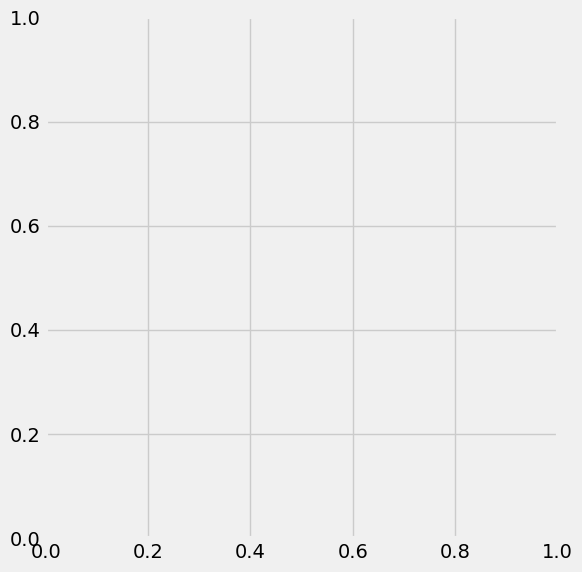

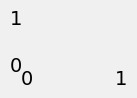

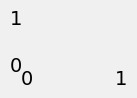

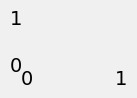

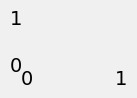

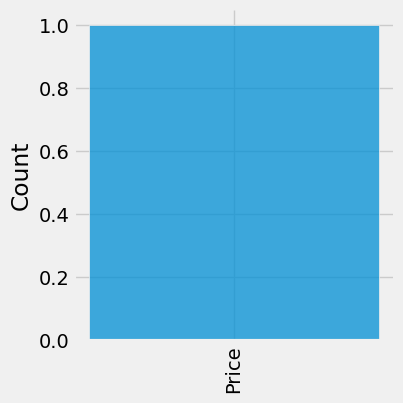

In [ ]:
import seaborn as sns
c=1

plt.figure(figsize=(20,45))
for i in categorical:
    plt.subplot(6,3,c)
    sns.displot("Price")
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1

plt.show()

<Axes: xlabel='Price', ylabel='Density'>

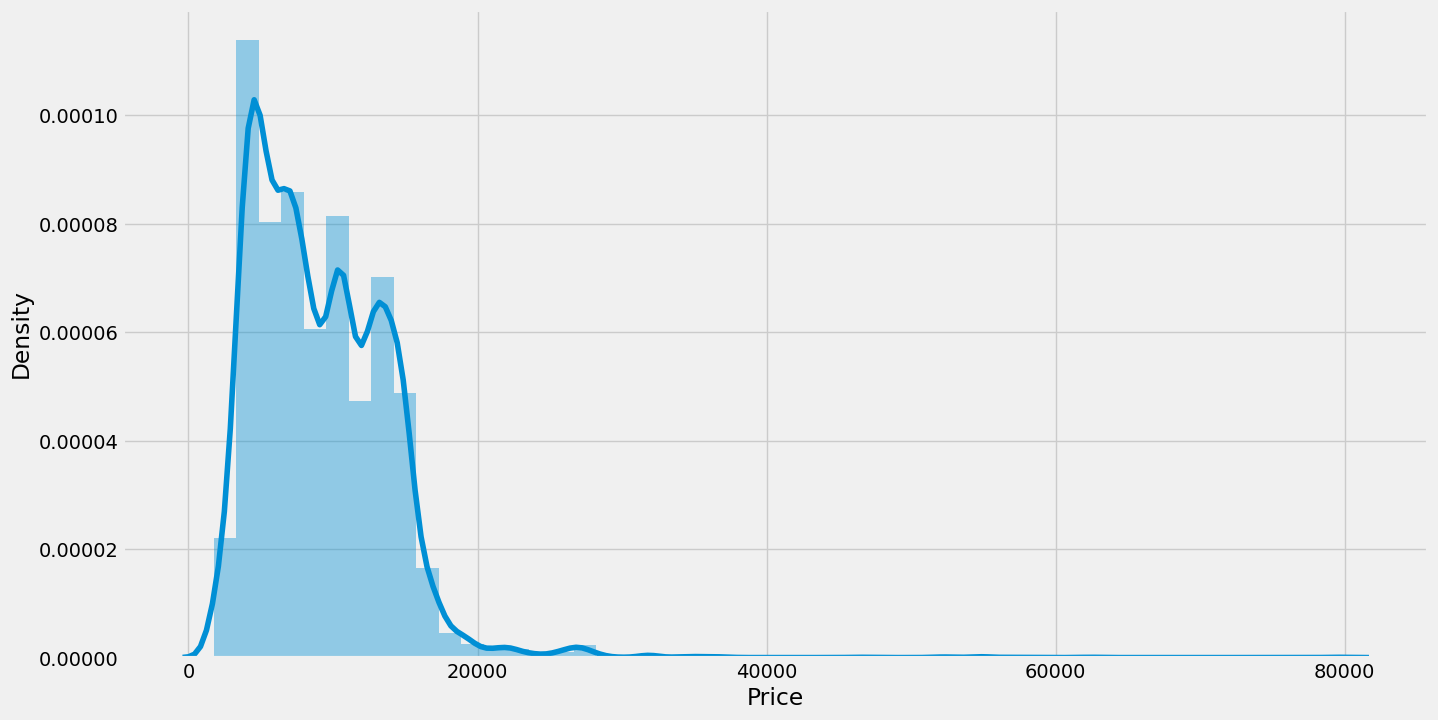

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'City1', 'City2', 'City3', 'Date', 'Month', 'Year',
       'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour',
       'Arrival_Time_Mins', 'Travel_Hours', 'Travel_Mins'],
      dtype='object')

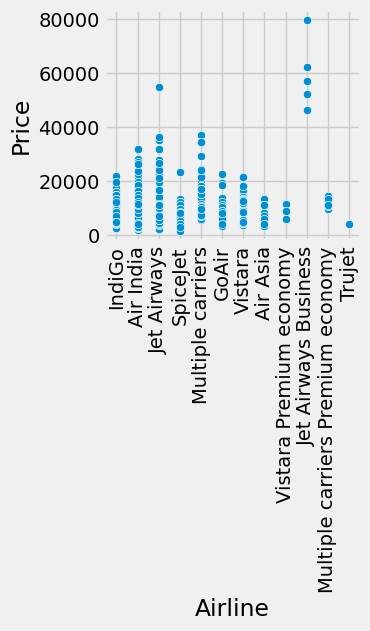

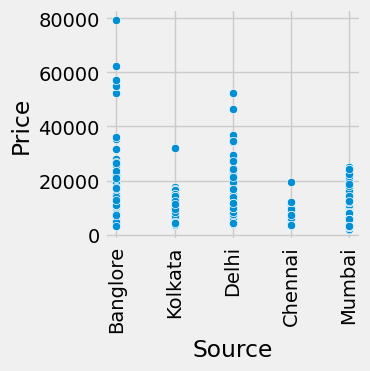

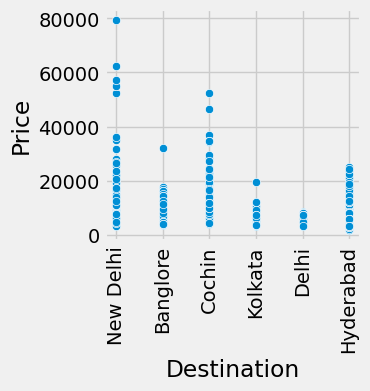

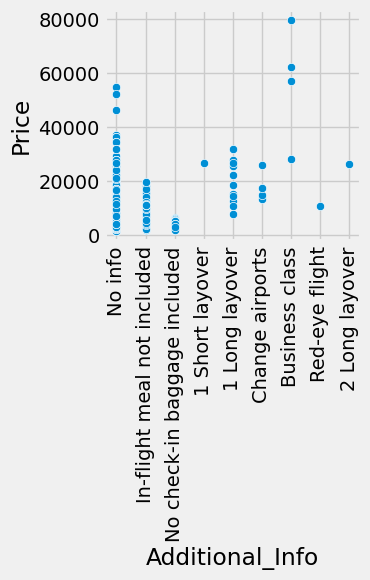

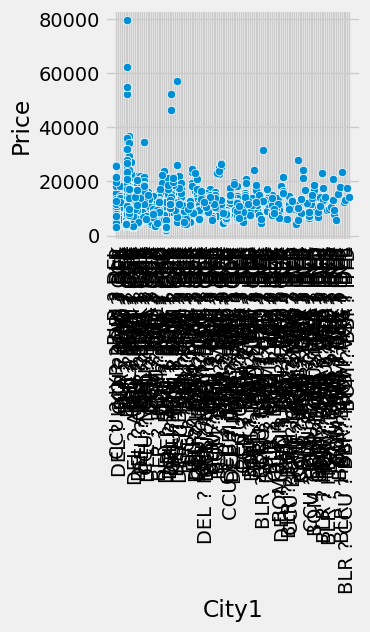

In [ ]:
import seaborn as sns
c=1

for i in categorical:
  plt.figure(figsize = (10,20))

  plt.subplot(6,3,c)

  sns.scatterplot(x=data[i],y=data.Price)
  plt.xticks(rotation=90)
  #plt.tight_layout(pad=3.0)
  c=c+1
  plt.show()

In [ ]:
data[data.Price>50000]
data.head()
pd.set_option('display.max_columns',25)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR ? DEL,NaN,None,24,3,2019,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU ? IXR ? BBI ? BLR,NaN,None,1,5,2019,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL ? LKO ? BOM ? COK,NaN,None,9,6,2019,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU ? NAG ? BLR,NaN,None,12,5,2019,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR ? NAG ? DEL,NaN,None,1,3,2019,16,50,1,21,35,4,45


In [ ]:
data['Year'].max()

2019

<Axes: >

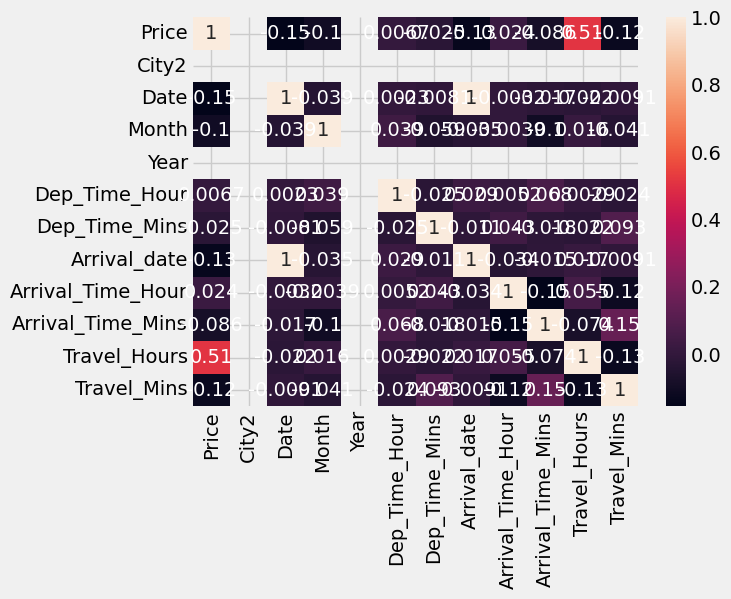

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10682 non-null  object 
 1   Source             10682 non-null  object 
 2   Destination        10682 non-null  object 
 3   Total_Stops        10681 non-null  object 
 4   Additional_Info    10682 non-null  object 
 5   Price              10682 non-null  int64  
 6   City1              10681 non-null  object 
 7   City2              0 non-null      float64
 8   City3              10682 non-null  object 
 9   Date               10682 non-null  int64  
 10  Month              10682 non-null  int64  
 11  Year               10682 non-null  int64  
 12  Dep_Time_Hour      10682 non-null  int64  
 13  Dep_Time_Mins      10682 non-null  int64  
 14  Arrival_date       10682 non-null  int64  
 15  Arrival_Time_Hour  10682 non-null  int64  
 16  Arrival_Time_Mins  106

In [ ]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR ? DEL,NaN,None,24,3,2019,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU ? IXR ? BBI ? BLR,NaN,None,1,5,2019,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL ? LKO ? BOM ? COK,NaN,None,9,6,2019,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU ? NAG ? BLR,NaN,None,12,5,2019,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR ? NAG ? DEL,NaN,None,1,3,2019,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,CCU ? BLR,NaN,None,9,4,2019,19,55,9,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,CCU ? BLR,NaN,None,27,4,2019,20,45,27,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,BLR ? DEL,NaN,None,27,4,2019,8,20,27,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,BLR ? DEL,NaN,None,1,3,2019,11,30,1,14,10,2,40


In [ ]:
c=1

for i in numerical:
  plt.figure(figsize=(10,20))
  plt.subplot(6,3,c)
  sns.scatterplot(x = data[i], y=data.Price)
  plt.xticks(rotation=90)
  #plt.tight_layout(pad=3.0)
  c=c+1
  plt.show()

<Axes: >

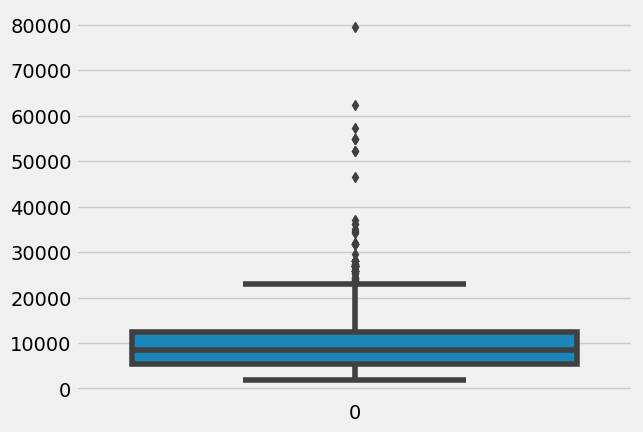

In [ ]:
import seaborn as sns
sns.boxplot(data['Price'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,18,0,0,24,3,2019,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,84,0,0,1,5,2019,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,118,0,0,9,6,2019,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,91,0,0,12,5,2019,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,29,0,0,1,3,2019,16,50,1,21,35,4,45


In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,18,0,0,24,3,2019,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,84,0,0,1,5,2019,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,118,0,0,9,6,2019,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,91,0,0,12,5,2019,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,29,0,0,1,3,2019,16,50,1,21,35,4,45


In [ ]:
data = data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price']]

In [ ]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


**TASK 4**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
data1 = ss.fit_transform(data)

In [ ]:
data1 = pd.DataFrame(data1,columns=data.columns)
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


In [ ]:
y = data['Price']
x = data.drop(columns=['Price'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10005,6,2,1,27,5,2019,8,30,27,19,15
3684,4,2,1,9,5,2019,11,30,10,12,35
1034,8,2,1,24,4,2019,15,45,24,22,5
3909,6,2,1,21,3,2019,12,50,22,1,35
3088,1,2,1,24,6,2019,17,15,25,19,15


In [ ]:
x_train.shape

(8545, 11)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
       print(i)

       print("R2 score is",r2_score(y_test,y_pred))
       print("R2 for train data",r2_score(y_train,i.predict(x_train)))
       print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
       print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
       print("Root Mean Squared Error is",(mean_squared_error(y_pred,y_test,squared=False)))


RandomForestRegressor()
R2 score is 0.8515121480209754
R2 for train data 0.9500578882363498
Mean Absolute Error is 1177.7676016483776
Mean Squared Error is 3138887.959970755
Root Mean Squared Error is 1771.6907066332867
GradientBoostingRegressor()
R2 score is 0.7652984210151785
R2 for train data 0.7338510043179753
Mean Absolute Error is 1682.572441052144
Mean Squared Error is 4961361.826189309
Root Mean Squared Error is 2227.41146315388
AdaBoostRegressor()
R2 score is 0.34460668207559075
R2 for train data 0.3309412214193297
Mean Absolute Error is 3126.896966338674
Mean Squared Error is 13854373.723237738
Root Mean Squared Error is 3722.146386594399


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model=keras.Sequential()
model.add(Dense(7,activation ='relu',input_dim=11))

model.add(Dense(7,activation='relu'))

model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 84        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse', optimizer = 'rmsprop',metrics = ['mae'])

In [ ]:
model.fit(x_train, y_train, batch_size = 20, epochs = 10)

Epoch 1/10
428/428 [==============================] - 1s 1ms/step - loss: 71990064.0000 - mae: 7012.1055
Epoch 2/10
428/428 [==============================] - 1s 1ms/step - loss: 22340136.0000 - mae: 3666.9233
Epoch 3/10
428/428 [==============================] - 1s 1ms/step - loss: 21414372.0000 - mae: 3661.2664
Epoch 4/10
428/428 [==============================] - 1s 1ms/step - loss: 21389832.0000 - mae: 3658.0247
Epoch 5/10
428/428 [==============================] - 1s 1ms/step - loss: 21371028.0000 - mae: 3660.1121
Epoch 6/10
428/428 [==============================] - 1s 1ms/step - loss: 21346280.0000 - mae: 3656.1741
Epoch 7/10
428/428 [==============================] - 1s 1ms/step - loss: 21321150.0000 - mae: 3652.7705
Epoch 8/10
428/428 [==============================] - 1s 2ms/step - loss: 21296254.0000 - mae: 3654.0142
Epoch 9/10
428/428 [==============================] - 1s 2ms/step - loss: 21275546.0000 - mae: 3650.3362
Epoch 10/10
428/428 [==============================] - 

In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score(rfr,x,y,cv=i)
  print(rfr,cv.mean())

RandomForestRegressor() 0.7906472826222231
RandomForestRegressor() 0.7939924398539332
RandomForestRegressor() 0.8004261758756234


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],
            'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [ ]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

gb_res.fit(x_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.923188801551709
test accuracy 0.7649932399542155


In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score(gb,x,y,cv=i)
  print(rfr,cv.mean())

RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7259748314083014
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7291307908658654
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7277688143142234


In [ ]:
gb=GradientBoostingRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
gb.fit(x_train,y_train)
y_train_pred=gb.predict(x_train)
y_test_pred=gb.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.6364865173543215
test accuracy 0.21682506482414032


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
       print(i)
       print("R2 score is",r2_score(y_test,y_pred))
       print("R2 score for train data",r2_score(y_train,i.predict(x_train)))
       print("Mean Absolute Error is",mean_absolute_error(y_test,y_pred))
       print("Mean Squared Error is",mean_squared_error(y_test,y_pred))
       print("Root Mean Squared Error is",(mean_squared_error(y_test,y_pred,squared=False)))


SVR()
R2 score is -0.030117446601644504
R2 score for train data -0.023060876999700497
Mean Absolute Error is 3629.610207677262
Mean Squared Error is 21775675.29868014
Root Mean Squared Error is 4666.441395611879


In [ ]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)

print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.8282052673851559
test accuracy 0.4817675302068355


In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(knn,x,y,cv=i)
    print(knn,cv.mean())

KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.4536753457959645
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.4716648334960763
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.5225757745979477


In [ ]:
predicted_values=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
predicted_values

,Actual,Predicted
6075,16655,16840.0
3544,4959,4959.0
9291,9187,8085.0
5032,3858,3597.0
2483,12898,16079.0
...,...,...
9797,7408,13587.0
9871,4622,6251.0
10063,7452,7452.0
8803,7060,6885.0


In [ ]:
prices=rfr.predict(x_test)

In [ ]:
price_list=pd.DataFrame({'Price':prices})

In [ ]:
price_list

,Price
0,14245.300000
1,5348.400000
2,8819.600000
3,3701.400000
4,15116.593333
...,...
2132,11754.300000
2133,5055.700000
2134,6831.900000
2135,10659.200000


In [ ]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))